In [1]:
import matplotlib.pyplot as plt
import wandb
# Import seaborn
import seaborn as sns
import pandas as pd
# Apply the default theme
sns.set_theme()

In [3]:
project="diffusion_novel_reward",
entity="pgm-diffusion"

In [2]:
api = wandb.Api()
# runs = api.runs(f'{entity}/{project}')
runs = api.runs('pgm-diffusion/diffusion_testing')

In [5]:
runs

<Runs pgm-diffusion/('diffusion_novel_reward',)>

In [13]:
runs[0].user.username

'jakd9'

In [18]:
filtered_runs = []
for run in runs:
    # if run.config.get("env_name") == 'walker2d-medium-v2':
    if (run.user.username == 'daniellawson9999' and run.config.get('model_type') == 'dmpc') or (run.config.get("model_type") == 'diffuser' and run.config.get("arch_type") == "DiffuserTransformer"):
        if run.config.get('n_episodes') == 5:
            filtered_runs.append(run)

In [19]:
len(filtered_runs)

58

In [12]:
filtered_runs

[<Run pgm-diffusion/diffusion_novel_reward/6k9m407y (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/zua6h87w (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/fzzqxj8e (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/0abwqhij (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/8mxsnz8j (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/i65nt1ks (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/o6kwpnno (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/s9trblfu (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/txrrtyl5 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/e3mh1srk (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/18zschn7 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/2tgvosz5 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/65rfwxs1 (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/v87lzd1g (finished)>,
 <Run pgm-diffusion/diffusion_novel_reward/ha7ozva5 (finished)>,
 <Run pgm-diffusion/diffu

In [93]:
# summaries = []
histories = []
for run in filtered_runs:
    avg_score = run.summary.get("avg_score")
    std_score = run.summary.get("std_score")
    env = run.config.get("env_name", None)
    if env is None:
        env = run.config.get("env_id")
    batch_size = run.config.get("batch_size")
    model_type = run.config.get("model_type")
    if model_type == 'dmpc':
        model_type = 'D-MPC(T)'
    elif model_type == 'diffuser':
        model_type = 'Diffuser(T)'
    # score = run.history()['score']
    hist = run.history(keys=['score'])

    entry = {
        "avg_score": avg_score,
        "std_score": std_score,
        "env": env,
        "batch_size": batch_size,
        "model_type": model_type,
    }
    # add entry values to hist
    for key in entry.keys():
        hist[key] = entry[key]
    histories.append(hist)
    # summaries.append(entry)
# df = pd.DataFrame(summaries)
df = pd.concat(histories, ignore_index=True)
# filter for batch size > 1 and < 256
df = df[df.batch_size > 1]
df = df[df.batch_size < 256]

In [72]:
df

,avg_score,std_score,env,batch_size,model_type
0,0.433277,0.007169,halfcheetah-medium-v2,2,Diffuser(T)
1,0.573716,0.083927,hopper-medium-v2,2,D-MPC(T)
2,0.444269,0.011307,halfcheetah-medium-v2,4,D-MPC(T)
3,0.577845,0.054325,hopper-medium-v2,4,D-MPC(T)
4,0.830016,0.009754,walker2d-medium-v2,4,D-MPC(T)
5,0.745727,0.079289,walker2d-medium-v2,2,D-MPC(T)
6,0.374436,0.115596,halfcheetah-medium-v2,2,D-MPC(T)
7,0.665848,0.103598,hopper-medium-v2,4,Diffuser(T)
8,0.721133,0.143878,walker2d-medium-v2,2,Diffuser(T)
9,0.594494,0.045671,hopper-medium-v2,2,Diffuser(T)


In [68]:
title_map = {
    'walker2d-medium-v2': 'Walker2d-Medium',
    'hopper-medium-v2': 'Hopper-Medium',
    'halfcheetah-medium-v2': 'HalfCheetah-Medium'
}

In [51]:
df.head()

,avg_score,std_score,env,batch_size,model_type
0,0.433277,0.007169,halfcheetah-medium-v2,2,diffuser
1,0.573716,0.083927,hopper-medium-v2,2,dmpc
2,0.444269,0.011307,halfcheetah-medium-v2,4,dmpc
3,0.577845,0.054325,hopper-medium-v2,4,dmpc
4,0.830016,0.009754,walker2d-medium-v2,4,dmpc


In [29]:
df.batch_size.unique()

array([  2,   4,   8,   1, 128, 256,  32,  16,  64])

In [30]:
df.env.unique()

array(['halfcheetah-medium-v2', 'hopper-medium-v2', 'walker2d-medium-v2'],
      dtype=object)

In [31]:
sns.set_style('whitegrid')
sns.set_style("whitegrid", {
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.5
})


In [32]:
palette  = sns.color_palette()
palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [33]:
plt.rcParams['figure.figsize']
[6.4, 4.8]


[6.4, 4.8]

In [38]:
ratio = 1.0
figuresize = (plt.rcParams['figure.figsize'][0] * ratio, plt.rcParams['figure.figsize'][1] * ratio)
figuresize

(6.4, 4.8)

In [35]:
display_labels = False

In [79]:
model_types = df.model_type.unique()

/tmp/ipykernel_1944/4006869575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env.loc[:, 'score'] = df_env['score'] * 100
/tmp/ipykernel_1944/4006869575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env.loc[:, 'avg_score'] = df_env['avg_score'] * 100
/tmp/ipykernel_1944/4006869575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

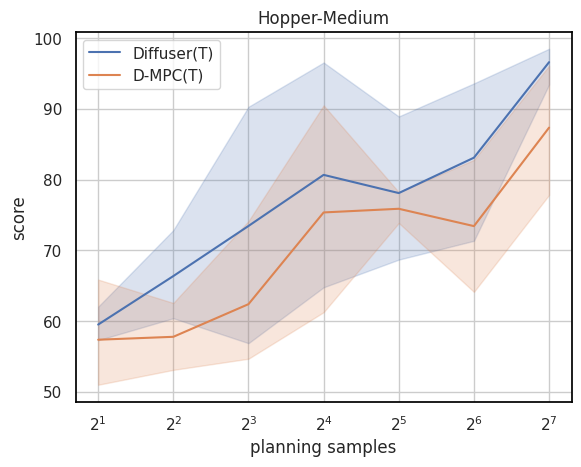

In [95]:
def plot(env_name, df, figuresize, palette, display_labels):
    # filter for env hopper-medium-v2
    df_env = df[df.env == env_name]
    # scale score by 100
    # df_hopper['avg_score'] = df_hopper['avg_score'] * 100
    # use loc
    df_env.loc[:, 'score'] = df_env['score'] * 100
    df_env.loc[:, 'avg_score'] = df_env['avg_score'] * 100
    df_env.loc[:, 'std_score'] = df_env['std_score'] * 100

    plt.figure (figsize=figuresize)
    sns.lineplot(data=df_env, x='batch_size', y='score', 
                 hue='model_type', 
                 palette=palette,
                 hue_order=model_types)
    # want x axis to be powers of 2, 
    plt.xscale('log', base=2)
    plt.ylabel('score')
    plt.xlabel('planning samples')
    plt.title(title_map[env_name])
    plt.legend(title='')
    # but want to show like 2, 4, 8, 16, 32, 64, 128, 256
    # plt.xticks([2, 4, 8, 16, 32, 64, 128])
    # Loop through each model type to add error bars
    # for model in df_env['model_type'].unique():
    #     subset = df_env[df_env['model_type'] == model]
    #     plt.errorbar(
    #         x=subset['batch_size'],
    #         y=subset['avg_score'],
    #         yerr=subset['std_score'],
    #         fmt='none',        # no line from errorbar, just the error caps
    #         ecolor='gray',     # errorbar color
    #         elinewidth=1,
    #         capsize=3,
    #         alpha=0.7
    #     )

plot('hopper-medium-v2', df, figuresize, palette, display_labels)

/tmp/ipykernel_1944/4006869575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env.loc[:, 'score'] = df_env['score'] * 100
/tmp/ipykernel_1944/4006869575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env.loc[:, 'avg_score'] = df_env['avg_score'] * 100
/tmp/ipykernel_1944/4006869575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

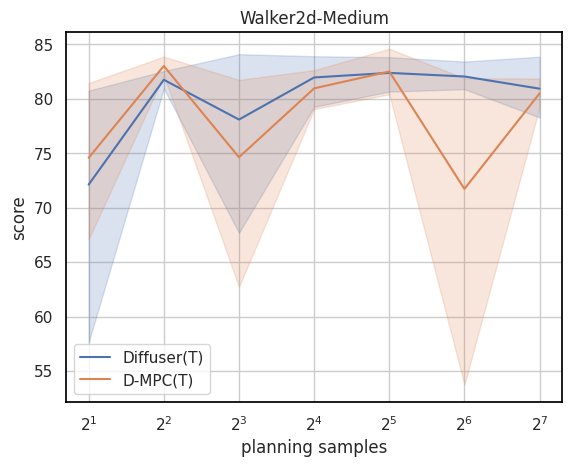

In [96]:
plot('walker2d-medium-v2', df, figuresize, palette, display_labels)

/tmp/ipykernel_1944/4006869575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env.loc[:, 'score'] = df_env['score'] * 100
/tmp/ipykernel_1944/4006869575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_env.loc[:, 'avg_score'] = df_env['avg_score'] * 100
/tmp/ipykernel_1944/4006869575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

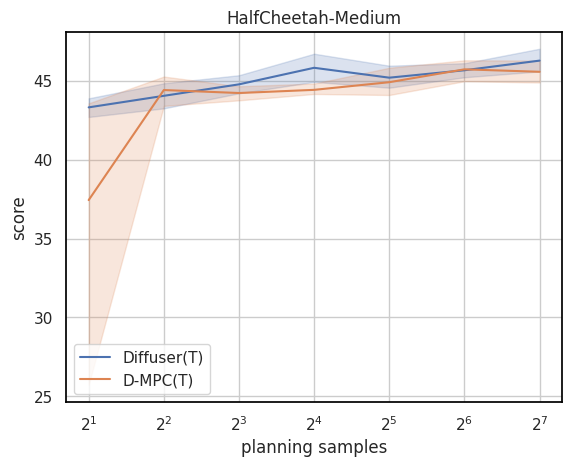

In [97]:
plot('halfcheetah-medium-v2', df, figuresize, palette, display_labels)